In [247]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import numpy as np

In [196]:
#pytrends = TrendReq(hl='en-US', tz=360+7*60, timeout=(10,25), retries=2, backoff_factor=0.1)
pytrends = TrendReq(hl='en-US', tz=360+7*60)
search_term = ["corona","covid","coronavirus","covid 19" ]


In [197]:
pytrends.build_payload(kw_list=search_term, timeframe='2020-01-01 2020-09-30', cat=0, geo='DE')

In [198]:
related_queries_df = pd.DataFrame(list(pytrend.related_queries().values())[0]['top'])
related_queries_list = list(keyword_df["query"])
print(related_queries_list)

['deutschland corona', 'corona aktuell', 'corona zahlen', 'corona news', 'corona virus', 'bayern corona', 'corona nrw', 'corona fälle', 'corona rki', 'corona usa', 'berlin corona', 'corona karte', 'corona fallzahlen', 'italien corona', 'corona test', 'corona hopkins', 'niedersachsen corona', 'corona symptome', 'corona infizierte', 'hessen corona', 'hamburg corona', 'corona sachsen', 'corona live', 'sachsen corona', 'corona in deutschland']


In [199]:
all_search_terms_list = search_term + related_queries_list
print (all_search_terms_list)

['corona', 'covid', 'coronavirus', 'covid 19', 'deutschland corona', 'corona aktuell', 'corona zahlen', 'corona news', 'corona virus', 'bayern corona', 'corona nrw', 'corona fälle', 'corona rki', 'corona usa', 'berlin corona', 'corona karte', 'corona fallzahlen', 'italien corona', 'corona test', 'corona hopkins', 'niedersachsen corona', 'corona symptome', 'corona infizierte', 'hessen corona', 'hamburg corona', 'corona sachsen', 'corona live', 'sachsen corona', 'corona in deutschland']


In [232]:
timeframe_first_half = '2020-01-01 2020-06-30'
timeframe_second_half = '2020-07-01 2020-09-30'

In [233]:
data_all = []
for i in range(0, (len(all_search_terms_list))):
    pytrends.build_payload(kw_list= [all_search_terms_list[i]],timeframe= timeframe_first_half, cat=0, geo='DE')
    data = pytrends.interest_over_time()
    pytrends.build_payload(kw_list= [all_search_terms_list[i]],timeframe= timeframe_second_half, cat=0, geo='DE')
    data_next = pytrends.interest_over_time()
    data = pd.concat([data, data_next])
    data = data.drop(labels=['isPartial'],axis='columns')
    data = data.reset_index()
    data = data.rename(columns={"corona":all_search_terms_list[i]})
    data_all.append(data)
    

In [234]:
data_all

[          date  corona
 0   2020-01-01       0
 1   2020-01-02       0
 2   2020-01-03       0
 3   2020-01-04       0
 4   2020-01-05       0
 ..         ...     ...
 269 2020-09-26      71
 270 2020-09-27      67
 271 2020-09-28      77
 272 2020-09-29      89
 273 2020-09-30      76
 
 [274 rows x 2 columns],
           date  covid
 0   2020-01-01      0
 1   2020-01-02      0
 2   2020-01-03      0
 3   2020-01-04      0
 4   2020-01-05      0
 ..         ...    ...
 269 2020-09-26     64
 270 2020-09-27     63
 271 2020-09-28     78
 272 2020-09-29     72
 273 2020-09-30     69
 
 [274 rows x 2 columns],
           date  coronavirus
 0   2020-01-01            0
 1   2020-01-02            0
 2   2020-01-03            0
 3   2020-01-04            0
 4   2020-01-05            0
 ..         ...          ...
 269 2020-09-26           19
 270 2020-09-27           19
 271 2020-09-28           19
 272 2020-09-29           20
 273 2020-09-30           18
 
 [274 rows x 2 columns],
       

In [260]:
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='date'), data_all)
df

,date,corona,covid,coronavirus,covid 19,deutschland corona,corona aktuell,corona zahlen,corona news,corona virus,...,corona hopkins,niedersachsen corona,corona symptome,corona infizierte,hessen corona,hamburg corona,corona sachsen,corona live,sachsen corona,corona in deutschland
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,71,64,19,51,78,74,76,37,68,...,46,48,58,41,36,73,57,20,57,69
270,2020-09-27,67,63,19,66,74,75,70,40,55,...,44,54,74,60,32,75,40,28,40,64
271,2020-09-28,77,78,19,76,86,81,88,45,66,...,48,48,80,60,35,78,63,30,63,74
272,2020-09-29,89,72,20,72,100,100,100,57,78,...,54,61,71,68,52,88,77,41,77,85


In [261]:
df["Mean"]=df.drop('date', axis=1).mean(axis=1)
df

,date,corona,covid,coronavirus,covid 19,deutschland corona,corona aktuell,corona zahlen,corona news,corona virus,...,niedersachsen corona,corona symptome,corona infizierte,hessen corona,hamburg corona,corona sachsen,corona live,sachsen corona,corona in deutschland,Mean
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,71,64,19,51,78,74,76,37,68,...,48,58,41,36,73,57,20,57,69,53.931034
270,2020-09-27,67,63,19,66,74,75,70,40,55,...,54,74,60,32,75,40,28,40,64,51.551724
271,2020-09-28,77,78,19,76,86,81,88,45,66,...,48,80,60,35,78,63,30,63,74,60.068966
272,2020-09-29,89,72,20,72,100,100,100,57,78,...,61,71,68,52,88,77,41,77,85,68.310345


In [262]:
df.Mean = df.Mean.round()

In [264]:
df

,date,corona,covid,coronavirus,covid 19,deutschland corona,corona aktuell,corona zahlen,corona news,corona virus,...,niedersachsen corona,corona symptome,corona infizierte,hessen corona,hamburg corona,corona sachsen,corona live,sachsen corona,corona in deutschland,Mean
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,71,64,19,51,78,74,76,37,68,...,48,58,41,36,73,57,20,57,69,54.0
270,2020-09-27,67,63,19,66,74,75,70,40,55,...,54,74,60,32,75,40,28,40,64,52.0
271,2020-09-28,77,78,19,76,86,81,88,45,66,...,48,80,60,35,78,63,30,63,74,60.0
272,2020-09-29,89,72,20,72,100,100,100,57,78,...,61,71,68,52,88,77,41,77,85,68.0


Text(0, 0.5, 'Trend')

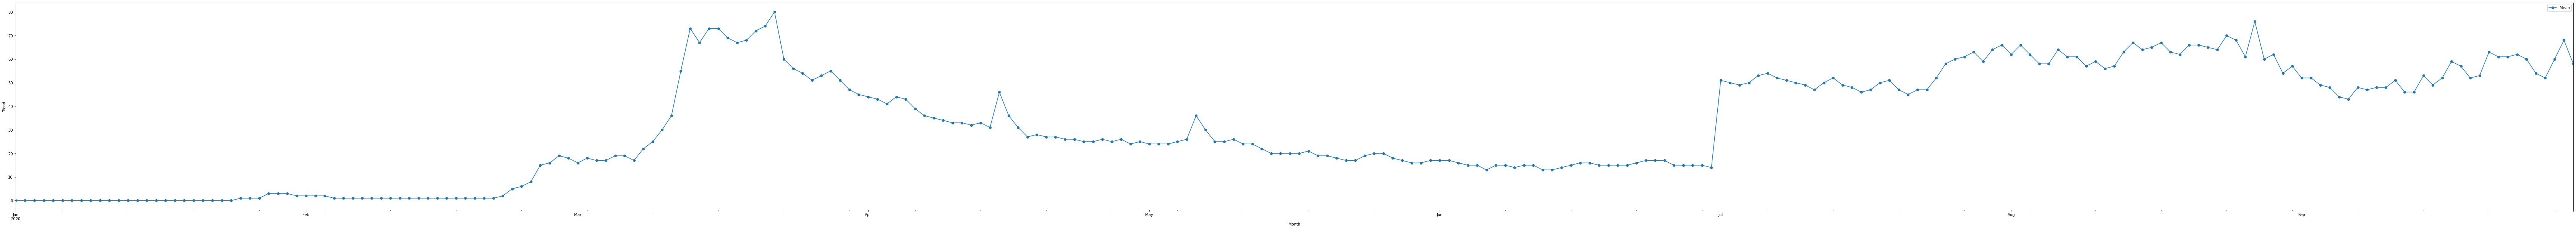

In [266]:
ax = df.reset_index().plot(x='date', y='Mean', figsize=(120, 10), marker ='o')
ax.set_xlabel("Month")
ax.set_ylabel("Trend")